In [54]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from adaptive_threshold import data_SDR, AdaptiveThreshold

ModuleNotFoundError: No module named 'adaptive_threshold'

Data matrix loading complete.


c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_spectral_py.py:462: UserWarning: Input data is complex, switching to return_onesided=False
  freqs, Pxx = csd(x, x, fs=fs, window=window, nperseg=nperseg,


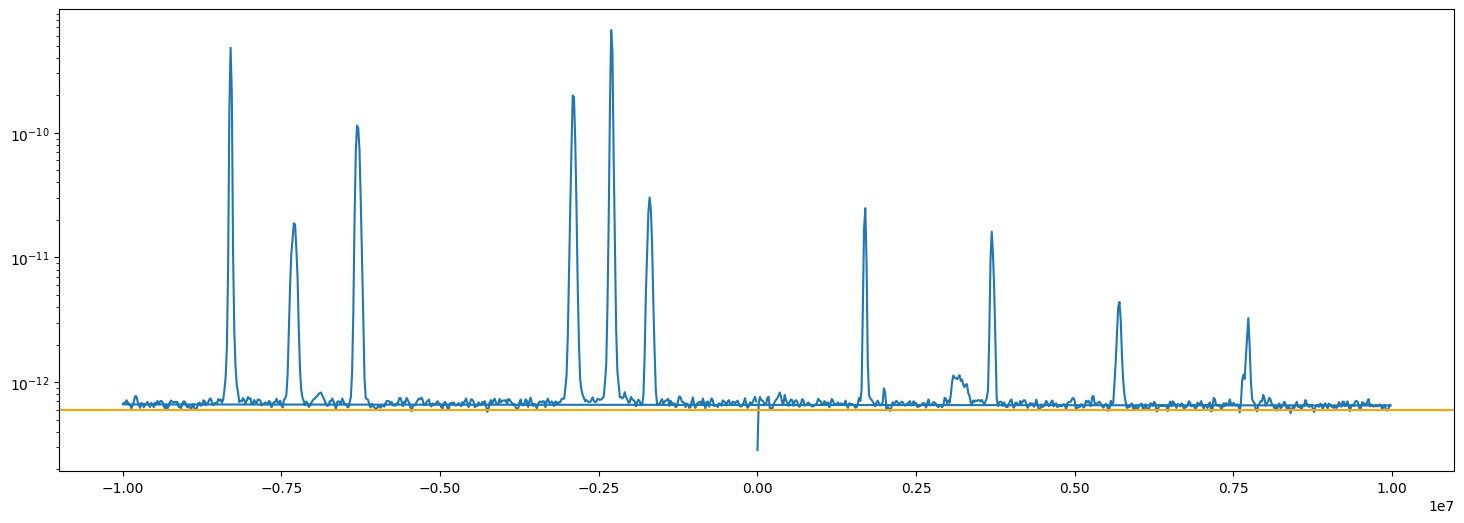

In [50]:
path_file_folder = r'C:\Samples-Hack-RF'
data_matrix = data_SDR(path_file_folder)

r_signal = data_matrix[6]

fs = 20e6  # Frecuencia de muestreo (ajustar a la frecuencia de muestreo de tu SDR)
time_sample = 0.01  # Duración total en segundos
num_samples = int(fs * time_sample)
t = np.linspace(0, time_sample, num_samples)

freq, Pxx = sig.welch(r_signal, fs=fs, nperseg=1024) #, scaling='density', return_onesided=False)

adaptive = AdaptiveThreshold(freq, Pxx)
threshold= adaptive.basic_threshold(Pxx, 0.1)

plt.figure(figsize=(18,6))
plt.semilogy(freq, Pxx)
plt.axhline(threshold, color='orange')
plt.show()


In [ ]:
folder_path2 = r'C:\Samples-tdt-Hack-RF'